In order to successfully complete this assignment you need to:
1. Participate both individually and in groups during class.
2. Submit this notebook to the `exercise` folder in your `cmse802-yourlastname` repository by 10pm __the SAME DAY of the class__. Late assignment will receive <=80% of the grade.

### <p style="text-align: left;"> &#9989; Put your name here:Pavan Yachamaneni </p>

---
# __Machine Learning Classification: In-Class__

# Learning objectives

At the end of the exercise, you should be able to:
- Conduct an end-to-end classification analysis given data
- Interpret model with example global and local interpretaion methods.

## Outline

1. [Pre-class Assignment Review](#preclass)
1. [Machine learning workflow](#workflow)
1. [Step 3/4: Split train/test and feature engineering](#step3_4)
1. [Step 5: Select model](#step5)
1. [Step 6: Repeat 2-5](#step6)
1. [Step 7: Evalute model](#step7)

----
<a name="preclass"></a>

# 1. Pre-Class Assignment Review

In your group, discussion the following.

&#9989; <font color=red>**QUESTION:**</font> Did you get stuck doing pre-class exercise or find some ideas confusing? If so where did you get stuck? What did you find confusing? What solutions did your groupmates suggest?

__In addition, discuss what issues are associated with the dataset and how you may fix them.__

<font size=+3>&#9998;</font> I was stuck at analyzing the data on processing, sandeep helped me in removing nulls and told me to use classification techniques. 

----
<a name="workflow"></a>

# 2. Machine learning workflow - emphasize again

In the in-class exercise, we have gone thorugh the 1st two steps, today, we will finish the entire thing:

|Step|Purpose|Notes|
|---|---|---|
|1|State the question and frame it as a machine learning problem|Is it a supervised or unsupervised learning problem? There are other major types (semi-supervised and reinforced learning).|
|2|Collect data, and exploratory data analysis (EDA)|Apply four types of EDA.|
|3|Split training and testing data|Seperate out testing data for evaluation purpose.|
|4|Engineer features| - Format data, impute missing values, normalize/scale features.<br>- Transform feature values, select informative features,<br>- Create combinatorial features (e.g., the interaction terms for basic linear model).<br>- Do dimension reduction to reduce the number of features.|
|5|Select models| - There are many models/algorithms/classifers making different assumptions about how modeling should be done. Thus, it is important to go through a wide range of them.<br>- And for each model/algorith, we need to tune __hyperparameters__, i.e., parameters that are set manually.<br>- Cross-validate model, i.e., separate data into training/validation subsets, use the training subset to train a model and score the model with the validation subset. Then split the training/validation subset again but differently, train and score. Repeat the process $k$ times.|
|6|Repeat 2-5|Work to iteratively improve the models.|
|7|Evaluate the best performing model|- After a best performing model is identified based on the training data, the model is applied to the testing set.<br>- Various model performance metric can be used to access how good the model is.|
|8|Interpret the model|- Dissect the model to better understand how it works.<br>- Identify most informative features for the best performing model.<br>- Assess the reasons behind false predictions to further improve model. (__for next meeting__)|
|9|Deploy model|Apply model to new data and make predictions.|

&#9989; <font color=red>**QUESTION:**</font> Discuss with your neighbor, is there any step that does not make sense to you?

<font size=+3>&#9998;</font> Interpreting the model is the step I found to be confused with. As this step further diagnosis the model.

---
<a name="step3"></a>
# __Step 3: Split train/test__

The best practice is alway to set aside testing data as early as you possibly can. This way, the testing data is truly independent from any of the modeling process aside from the processing steps needed. Nonetheless, there may be things you need to take care of first before splitting the data. In this example, we need to rid of unwanted instances before data split.


### ___Load data and have a quick look____

&#9989; **<font color=blue>DO THIS:</font>** Before we get started, make sure you started your jupyter notebook from the `sklearn` environment you created in pre-class exercise. Also all the required packages should be installed. Let's test this by import the required packages.

In [74]:
# Test your install
import sklearn, pandas, matplotlib, seaborn, imblearn, numpy, shap, ipywidgets, tqdm

&#9989; **<font color=blue>DO THIS:</font>** Before we split data and do feature engineering, let's set a random seed for reproducibility purpose and load the data and look at a few random rows.

In [75]:
import pandas as pd

rand_seed = 42

data = pd.read_csv("enzyme_gene.csv", index_col=0)
data.sample(10)

Label  Func_likelihood  Fam_size  Max_id_paralog  WGD_alpha  \
Gene                                                                       
AT1G23480  unknown            0.633      14.0           71.33        0.0   
AT1G64390  unknown            0.990      25.0           77.19        0.0   
AT4G26200       GM            0.785      11.0           59.72        1.0   
AT4G39970       SM              NaN       5.0           39.83        1.0   
AT3G12800       GM            1.000      66.0           94.56        0.0   
AT3G46170       GM            0.233      66.0           87.50        0.0   
AT4G25220  unknown            0.430       5.0           83.13        0.0   
AT2G32010       GM            0.960      11.0           77.12        0.0   
AT5G14130  unknown              NaN      82.0           57.00        0.0   
AT1G09630  unknown            1.000      76.0           75.69        0.0   

           WGD_beta_gamma  Dup_recent  Dup_tandem  Singleton  \
Gene                                                           
AT1G23480             1.0         0.0         0.0        0.0   
AT1G64390             0.0         0.0         0.0        0.0   
AT4G26200             0.0         0.0         0.0        0.0   
AT4G39970             0.0         0.0         0.0        1.0   
AT3G12800             0.0         0.0         0.0        0.0   
AT3G46170             0.0         0.0         0.0        0.0   
AT4G25220             1.0         0.0         0.0        0.0   
AT2G32010             0.0         0.0         0.0        0.0   
AT5G14130             0.0         0.0         0.0        0.0   
AT1G09630             0.0         0.0         0.0        0.0   

           Max_PCC_GM_abiotic  Max_PCC_SM_abiotic  Max_PCC_GM_biotic  \
Gene                                                                   
AT1G23480               0.880               0.877              0.880   
AT1G64390               0.816               0.804              0.937   
AT4G26200               0.777               0.804              0.859   
AT4G39970               0.946               0.810              0.960   
AT3G12800               0.779               0.731              0.960   
AT3G46170               0.873               0.820              0.904   
AT4G25220               0.764               0.657              0.744   
AT2G32010               0.889               0.690              0.878   
AT5G14130               0.596               0.635              0.926   
AT1G09630               0.852               0.773              0.935   

           Max_PCC_SM_biotic  Max_PCC_GM_hormone  Max_PCC_SM_hormone  \
Gene                                                                   
AT1G23480              0.851               0.722               0.706   
AT1G64390              0.902               0.844               0.691   
AT4G26200              0.833               0.781               0.652   
AT4G39970              0.879               0.828               0.765   
AT3G12800              0.946               0.820               0.847   
AT3G46170              0.923               0.800               0.738   
AT4G25220              0.716               0.928               0.848   
AT2G32010              0.867               0.875               0.828   
AT5G14130              0.894               0.881               0.870   
AT1G09630              0.824               0.924               0.835   

           Expr_med_dev  Expr_max_dev  Expr_breadth_dev  
Gene                                                     
AT1G23480    145.028232    438.193318              50.0  
AT1G64390    459.862039   2558.725521              62.0  
AT4G26200     14.367289   2708.572758              21.0  
AT4G39970    262.880658   1094.532835              54.0  
AT3G12800    768.102609   3072.252784              64.0  
AT3G46170      9.439900     78.715922               9.0  
AT4G25220      7.002721    619.676721               5.0  
AT2G32010     62.457419    243.459823              61.0  
AT5G14130      5.3293

- Step1: Know about each attributes independently
- Step2: Find relationships among attributes
- Step3: Know issues associated with the data

We will process the input data in a way similar to what we did for the basic linear model exercise. In addition to the issues we see in the California housing data, there are three __new issues__ we need to work on:

1. Unwanted instances:
   - In the label columns, beside `GM` and `SM` we are intersted in, there are also `unknown` and 'NaN`.
1. Missing values:
   - In pre-class, you should have seen a very large number of rows for some features are missing (ie., null, not-a-number, or `NaN`).
1. Imbalanced data:
   - There are far more genes labeled as `GM` (2212) than 'SM` (410).

The last two issues will be dealt with in Step 4.


### ___Deal with unwanted instances___

&#9989; **<font color=blue>DO THIS:</font>** Filter data so only instances with `SM` and `GM` labels are kept. 

Write code to show that the filtering is working (i.e, no more `unknown` or `NaN`).

In [76]:
labels = ['GM', 'SM']

# fil: filtered
data_fil = data[data['Label'].isin(labels)]

# provide your codes here
data_fil.isna().sum()

Label                   0
Func_likelihood       702
Fam_size              361
Max_id_paralog        532
WGD_alpha             226
WGD_beta_gamma        226
Dup_recent            237
Dup_tandem            237
Singleton             370
Max_PCC_GM_abiotic    361
Max_PCC_SM_abiotic    361
Max_PCC_GM_biotic     361
Max_PCC_SM_biotic     361
Max_PCC_GM_hormone    361
Max_PCC_SM_hormone    361
Expr_med_dev          362
Expr_max_dev          362
Expr_breadth_dev      362
dtype: int64

&#9989; **<font color=blue>DO THIS:</font>** For classification tasks, class values are typically integers instead of strings. Here we will convert `GM` and `SM` to 0 and 1. Comment on the following lines.

In [77]:
from sklearn import preprocessing

# created an object called le for which further analysis
le = preprocessing.LabelEncoder()

# for le, again instanciated fit_transform method which needs the pandas data series that needs labelling
data_fil['Label'] = le.fit_transform(data_fil.Label)

# Outputs the count of 0's and 1's
data_fil['Label'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0    2212
1     410
Name: Label, dtype: int64

### ___Split training/testing sets___

&#9989; **<font color=blue>DO THIS:</font>** Let's split the training and testing data. Comments on the following lines:

In [79]:
from sklearn.model_selection import train_test_split

# for the data, and with a random seed value,it gets splitted into 4:1 ratio. 
# Further data is imbalenced so statify takes care of this issue bysplitting in the same ratio. 
train, testt = train_test_split(data_fil, test_size=0.2, 
                               stratify=data_fil.Label,
                               random_state=rand_seed)

# Print the % of 0's and 1's in training data
print(train['Label'].value_counts()/train.shape[0])

# Print the % of 0's and 1's in testing data
print(testt['Label'].value_counts()/testt.shape[0])

0    0.843586
1    0.156414
Name: Label, dtype: float64
0    0.84381
1    0.15619
Name: Label, dtype: float64


---
<a name="step3"></a>
# __Step 4: Feature engineering__

Feature engineering involves processing, transforming, selecting, combining features in ways that will improve the model. Here we will deal with three issues:
1. Missing data
2. Data imbalance (many more class GM and class SM)
3. Feature value range differences

What we will not deal with but typically done:
- Selecting the most informative features to build model and thus reduce model complexity.
- Dimensionality reduction: particularly in situations where there are far more features than instances.

### ___Deal with missing data___

There are a lot of data missing. There are two major ways of dealing with them:
1. Drop all rows and/or columns with any missing data
    - In our example, this will throw out ~40$ of the data. Not good.
1. Impute missing values by making some assumptions, e.g.,:
    - Assuming that missing values are well represented by mean, median, or mode of the existing values.
      - This can be done with Sckit-Learn `SimpleImputer`.
    - Or Assuming that the missing value of an instance X will be similar to the values of other instances that are similar to X based on non-missing values.
      - This is what's done in Scikit-Learn `KNNImputer`.

We will just try to deal with this in one way. __In reality__, You need to try multiple approaches to see how you can get the best results.

&#9989; **<font color=blue>DO THIS:</font>** Let's drop any rows with >25% missing values and see how many instances are still there.

In [80]:
row_na_num = train.isnull().sum(axis=1)
num_feat   = train.shape[1] - 1
train_drop = train[row_na_num/num_feat < 0.25]
train_drop['Label'].value_counts()

0    1529
1     272
Name: Label, dtype: int64

&#9989; **<font color=blue>DO THIS:</font>** A lot of data is removed but this is much better than just drop any row with missing values. Next, let's try to impute the missing values with `KNNImputer`.

In [81]:
from sklearn.impute import KNNImputer

# initiating KNNImputer class with 5 neighbours in each cluster
imputer1 = KNNImputer(n_neighbors=5)

# data is fitted into the imputer object
imputer1.fit(train_drop)

# data is processed into imputer object
train_drop_imp = imputer1.transform(train_drop)

#converthing into pandas data frame type
train_drop_imp = pd.DataFrame(train_drop_imp, columns=train_drop.columns)

# Validating wether Null are gone or not
train_drop_imp.isnull().sum()

Label                 0
Func_likelihood       0
Fam_size              0
Max_id_paralog        0
WGD_alpha             0
WGD_beta_gamma        0
Dup_recent            0
Dup_tandem            0
Singleton             0
Max_PCC_GM_abiotic    0
Max_PCC_SM_abiotic    0
Max_PCC_GM_biotic     0
Max_PCC_SM_biotic     0
Max_PCC_GM_hormone    0
Max_PCC_SM_hormone    0
Expr_med_dev          0
Expr_max_dev          0
Expr_breadth_dev      0
dtype: int64

__Note__ that there is a hyperparamter here: `n_neighbors`. We set it to 5 here but __in reality__, multiple values need to be tested and evaluated. Also, you DO NOT impute labels. We did not exclude the label column because we have make sure there is no missing value early on. So imputation will not impact it.

&#9989; **<font color=blue>DO THIS:</font>** Write code that will impute the testing set:
1. Drop any rows with > 25% missing values.
2. Impute missing value with KNNImputer.
3. Check that there is no missing value.

In [82]:
# put your code here
row_na_num = testt.isnull().sum(axis=1)
num_feat   = testt.shape[1] - 1
test_drop = testt[row_na_num/num_feat < 0.25]
test_drop['Label'].value_counts()

0    367
1     63
Name: Label, dtype: int64

In [83]:
# from sklearn.impute import KNNImputer

# initiating KNNImputer class with 5 neighbours in each cluster
# imputer = KNNImputer(n_neighbors=5)

# data is fitted into the imputer object
# imputer.fit(test_drop)

# data is processed into imputer object
test_drop_imp = imputer1.transform(test_drop)

#converthing into pandas data frame type
test_drop_imp = pd.DataFrame(test_drop_imp, columns=test_drop.columns)

# checking the presence of Null values
test_drop_imp.isnull().sum()

Label                 0
Func_likelihood       0
Fam_size              0
Max_id_paralog        0
WGD_alpha             0
WGD_beta_gamma        0
Dup_recent            0
Dup_tandem            0
Singleton             0
Max_PCC_GM_abiotic    0
Max_PCC_SM_abiotic    0
Max_PCC_GM_biotic     0
Max_PCC_SM_biotic     0
Max_PCC_GM_hormone    0
Max_PCC_SM_hormone    0
Expr_med_dev          0
Expr_max_dev          0
Expr_breadth_dev      0
dtype: int64

__Note:__ `testing` data should never be used to `fit` the imputer. Instead, you should use the fitted imputer to `tranform` test set.

### ___Deal with data imbalance___

The imbalance between the two classes is a major issue. With nearly 5 times more GM genes, we will learn more about them than the SM class. This is not desirable. We can:
1. Down-sample the GM class to match the minority class: 
   - Problem here is that we are throwing away valuable data.
2. Up-sample the SM class to match the majority class
   - Problem here is that upsampling procedure will lead to model overfitting.

&#9989; **<font color=blue>DO THIS:</font>** Here we will use a compromised approach:
- Up-sample the minority class so it has twice as many instances __AND__ 
- Downsample the majority class so it is the same number as the minority.

After you run the following cell with the values I provided:
- Play with `sampling_strategy` values in both `SMOTE` and `RandomUnderSampler`.
- Discuss with your neighbors what these values mean and how do they impact the ratio between the two classes.

In [84]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

X_train = train_drop_imp.iloc[:,1:] # feature data
y_train = train_drop_imp.iloc[:,0]  # labels

# This will be used in many other occasions.
feat_names = X_train.columns 

# summarize class distribution
counter = Counter(y_train)
print(counter)
# Over-sample minority, under-sample majority
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_bal, y_train_bal = pipeline.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train_bal)
print(counter)


Counter({0.0: 1529, 1.0: 272})
Counter({0.0: 611, 1.0: 611})


&#9989; **<font color=red>QUESTION:</font>** Resampling, particularly upscampling can __only__ be applied to the training data. The testing set __should not__ be changed in this step. Discuss with your neighbor, why is that?

<font size=+3>&#9998;</font>
Testing data is just 20% for the whole data set and if we manipulate it, leads to degrading the model performance.

### ___Deal with data scaling___

&#9989; **<font color=blue>DO THIS:</font>** Bassed on your exploration pre-class you probably see other issues with the data that need to be taken care of. The most important is data scaling. In the cell below, write code that will use `RobustScaler` to scale the balanced training data feature values (`X_train_bal`).

__DO NOT__ applying scaling to the labels (`y`).

Call the scaled features as `X_train_scale` and the labels as `y_train_scale` (even though it is not changed, this is for consistency).

In [85]:
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt

scaler        = RobustScaler().fit(X_train_bal)

# put your code here
X_train_scale = scaler.transform(X_train_bal)
y_train_scale = y_train_bal

&#9989; **<font color=blue>DO THIS:</font>** Provide code below to process testing data so it is scaled the same way.
- Create `X_test` and `y_test` with `test_drop_imp`.
- Transform `X_test` with the `RobustScaler` but __do not__ fit it.

In [86]:
# put your code here
X_test = test_drop_imp.iloc[:,1:] # feature data
y_test = test_drop_imp.iloc[:,0]  # labels
X_test_scale = scaler.transform(X_test)
y_test_scale = y_test

---
<a name="step5"></a>
# __Step 5: Select model__

Assume that we are happy with the feature engieerning outcome, the next phase is to:
1. Determine which model (=algorithm, classifier, estimator) is the best given the training data,
1. For each model, find (= tune) the potentially best combinations of hyperparameters, i.e., parameters that are not automately identified by the algorithm,
1. For each hyperparameter combination, train `k` times based on a $k$-fold __cross-validation__ scheme. 

So this means that, for __each algorithm__ (e.g., Random Forest), the number of models you train will be:

$$N_{\text{training}} = N_{\text{hyperparameter combination}} \times k$$

&#9989; **<font color=red>QUESTION:</font>** Here is an illustration of a 10-fold cross validation scheme:

<img alt="A typical classification workflow" src="https://raw.githubusercontent.com/ShiuLab/ML_workshop/master/img/4_model_select_cv.png">

Cross-validation is done to reduce model overfitting. Discuss with your neighbor what the consequence is if we just split training data into training/validation subset once. Also, can you come up with a different cross-validation scheme?

<font size=+3>&#9998;</font> Put your answer here

### ___Model 1: Random forest___

&#9989; **<font color=blue>DO THIS:</font>** Here we will not go into details on how the RandomForest algorithm works. there is a substantial number of good tutorial/blog posts on RandomForest and I encourage you to look into it. Comments on the major steps as indicated.

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# COMMENT: how many hyperparameter combinations we are testing here? => 60 hyperparameters
param_grid = {'n_estimators': [200, 500],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini', 'entropy']}

# we are not changing shapes of random forest classifier upon multiple times of running the code
rfc = RandomForestClassifier(random_state=rand_seed)

# running through all possible parameters
rfc_gs = GridSearchCV(rfc,
                       param_grid,
                       cv=5,              # 5 fold cv
                       verbose=1,
                       scoring='roc_auc', # COMMENT
                       n_jobs=8) # number of concurrent jobs, you need to
                                 # adjust this based on the number of CPU cores
                                 # available on your machine.

# fitting the training and testing data for the all combination of models.
rfc_gs.fit(X_train_scale, y_train_scale)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='roc_auc', verbose=1)

In [39]:
print(dir(rfc_gs))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_check_refit_for_multimetric', '_estimator_type', '_format_results', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_run_search', '_select_best_index', '_validate_data', 'best_estimator_', 'best_index_', 'best_params_', 'best_score_', 'classes_', 'cv', 'cv_results_', 'decision_function', 'error_score', 'estimator', 'fit', 'get_params', 'inverse_transform', 'multimetric_', 'n_features_in_', 'n_jobs', 'n_splits_', 'param_grid', 'pre_dispatch', 'predict', 'pr

In [43]:
rfc_gs.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

&#9989; **<font color=blue>DO THIS:</font>** Bassed on the output of `dir(grid_search)` above, write code that will print out:

1. The best hyperparameters
1. The cross-validation folds.
1. The scorer: This is used to find the best estimator. 
   - Here __ROC-AUC__ (Receiver Operating Characteristic-Area Under Curve) is used. A random model has a score of 0.5 and a perfect model has a score of 1. It is also referred to as auROC, aucROC, AUC-ROC, ...
   - Note that there are [many other scorers](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter). So this is another hyperparmeter you can tune.
1. The best score: this is averged across CV folds for the best estimator.

In [44]:
# put your code here
rfc_gs.cv

5

In [48]:
rfc_gs.scorer_

make_scorer(roc_auc_score, needs_threshold=True)

In [49]:
rfc_gs.scoring

'roc_auc'

In [50]:
rfc_gs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='auto',
                       n_estimators=500, random_state=42)

In [51]:
rfc_gs.best_score_

0.9152198137138587

&#9989; **<font color=blue>DO THIS:</font>** Although we finished the run rather quickly here, a typical model fitting process can take hours or even days! Thus, the models should be saved so you can reused them in the future. Run the following to save the best estimator. 

In [52]:
import pickle

filename = "model_randomforest_gridsearch.save"

pickle.dump(rfc_gs.best_estimator_, open(filename, 'wb'))

### ___Model 2: Support Vector Classifier (SVC)___

&#9989; **<font color=blue>DO THIS:</font>** There are [many other supervised learning algorithms in Scikit-Learn](https://scikit-learn.org/stable/supervised_learning.html). __Let's use [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)__. Based on the documentation link provided, write code that will:

- Set up a parameter grid - control the combination to be ~40. But in reality, this is much larger.
- Initialize an SVC object
- Initialize a `GridSearchCV` object
- Train (fit) classifer with `GridSearchCV` object
- Report best parameter and score
- Save the best estimator as a pickled file.
- Comment on whether this is better than RandomForest.

In [61]:
# put your code here
from sklearn.svm import SVC
param_grid2 = {'kernel': ['linear', 'poly', 'rbf']
              }
svc = SVC(random_state=rand_seed)
svc_cf = GridSearchCV(svc,
                       param_grid2,
                       cv=5,              # 5 fold cv
                       verbose=1,
                       scoring='roc_auc', # COMMENT
                       n_jobs=8) # number of concurrent jobs, you need to
                                 # adjust this based on the number of CPU cores
                                 # available on your machine.


svc_cf.fit(X_train_scale, y_train_scale)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=8,
             param_grid={'kernel': ['linear', 'poly', 'rbf']},
             scoring='roc_auc', verbose=1)

In [60]:
svc_cf.best_estimator_

SVC(random_state=42)

We just try two algorithms here, you should try a lot more.

In addition, beyond the hyperparameters associated with the algorithms, there are other things to tuned here:
- Cross validation methods: There are quite a number of approaches. See [this](https://scikit-learn.org/stable/modules/cross_validation.html) for examples.
- Searching parameters: Grid search is but one approach. Two other popular methods are [randomized search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) and [Bayesian optimization](https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html). These should be treated tried as well.

---
<a name="step6"></a>
# __Step 6. Repeat Step 2-5__

Given the time limit, we will move on to Step 7. But in a typical ML project, after you have explored different algorithms to find the best __initial__ model, it is time to go back to tweak everything to see if you can do even better. Things don't just end here!

One thing though, ML is getting automated. There are a growing number of automated machine learning (AutoML) projects aiming at automating all aspects of ML tasks. For example, there are open-source projects like [auto-sklearn](https://automl.github.io/auto-sklearn/master/), [AutoGluon](https://auto.gluon.ai/stable/index.html) or paid services like [Google AutoML](https://cloud.google.com/automl/) and [Amazon's SageMaker](https://aws.amazon.com/sagemaker/). This is where machine learning is going, so you can focus on the more intellectually demanding parts, i.e., get the features right and interpret the model based on your expert knowledge (see step 8). 

Give it another few years I don't think this tutorial will be relevant.

---
<a name="step7"></a>
# __Step 7. Evaluate model with the testing set__

Assume that we are done with model building and have a final model that we cannot improve further. Then it is time to use the testing set to evaluate the model.

&#9989; **<font color=blue>DO THIS:</font>** Random Forest does quite a lot better than SVC. So let's see how well it works on the testing set.

Recall we save the best estimator for Random Forest earlier, let's load it up and evaluate it.

In [62]:
filename = "model_randomforest_gridsearch.save"

rfc_loaded = pickle.load(open(filename, 'rb'))

# Put your code here


## ___Confusion matrix___

&#9989; **<font color=blue>DO THIS:</font>** Let's generate a __confusion matrix__. Disucss with your neighbor, what does the confusion matrix tell us?

X has feature names, but RandomForestClassifier was fitted without feature names


0.0    367
1.0     63
Name: Label, dtype: int64


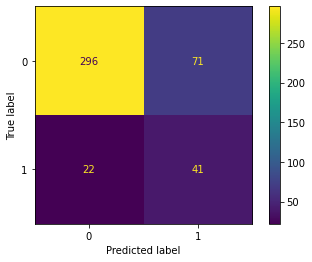

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# First generate predictions of the testing data
y_test_pred = rfc_loaded.predict(X_test)

print(y_test.value_counts()) # y_test has 367 label 0 (GM), and 63 label 1 (SM)

cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

Based on the confusion matrix:
- Number of true negative ($tn$) = 22
- Number of false positive ($fp$) = 71
- Number of false negative ($fn$) = 41
- Number of true positive ($tp$) = 296

&#9989; <font color=red>**QUESTION:**</font> How does this model do? If you need to priortize, which number do you want to improve? Why?

<font size=+3>&#9998;</font> On diagonal values should increase and off diagonal values should decrease.

## ___Classification report___

&#9989; **<font color=blue>DO THIS:</font>** Let's also generate a classification report to get a few other performance matrics.

In [64]:
from sklearn.metrics import classification_report

# Set class names
targets = ["GM", "SM"]

report = classification_report(y_test, y_test_pred, target_names=targets)
print(report)

              precision    recall  f1-score   support

          GM       0.93      0.81      0.86       367
          SM       0.37      0.65      0.47        63

    accuracy                           0.78       430
   macro avg       0.65      0.73      0.67       430
weighted avg       0.85      0.78      0.81       430



Let's define these metrics:

|Metric|Formula|
|---|-------|
|Precision|$p = tp/(tp + fp)$|
|Recall|$r = tp / (tp + fn)$|
|F1 score|$f1 = 2(p\times r)/(p + r)$|
|Accuracy|$(tp+tn)/(tp+fp)$|
|Macro averge|$0.5\times score_{\text{class0}} + 0.5\times score_{\text{class1}}$|
|Weighted averge|$P_{\text{class0}}\times score_{\text{class0}} + P_{\text{class1}}\times score_{\text{class1}}$<br>$P$: proportion of a class.|

Support: number of each class (not a performance metric)


&#9989; <font color=red>**QUESTION:**</font> Which performance metric do you find the most informative? Why?

<font size=+3>&#9998;</font> 
Just by seeing the values, we can not say which performance metric is best. But, by changing parameters in feature engineering, test/train split we can.

## ___Graphics that help with evaluation___

&#9989; **<font color=blue>DO THIS:</font>** Here we provide two examples: ROC-AUC curve and precision-recall curve. The red line indicate how a naive classifer woul fair with random guesses.

X has feature names, but RandomForestClassifier was fitted without feature names
X has feature names, but RandomForestClassifier was fitted without feature names


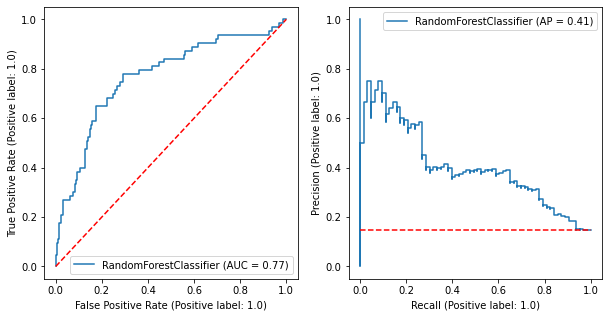

In [65]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

def plot_curves(X, y, estimator):

    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    # ROC-AUC curve
    RocCurveDisplay.from_estimator(estimator, X, y, ax=axs[0])
    axs[0].plot([0, 1], [0, 1],'r--')

    # Precision-recall curve
    PrecisionRecallDisplay.from_estimator(estimator, X, y, ax=axs[1])
    axs[1].legend(loc='upper right')
    axs[1].plot([0, 1], [0.1465, 0.1465],'r--')

    plt.show()

plot_curves(X_test, y_test, rfc_loaded)

The following video gives you a better understanding of the ROC-AUC curve. 


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("4jRBRDbJemM",width=640,height=360)

&#9989; <font color=red>**QUESTION:**</font> Discuss with your neighbor, why is the ROC-AUC score lower for the testing set compared to the best score from training?

Also, in both cases, we want the area under curve to be 1. A naive model will have a ROC-AUC of 0.5. But for Precision-Recall curve, the base line is __far below__ 0.5 like ROC-AUC. Why is that?

<font size=+3>&#9998;</font> Replace with your answer to the above question!

-----
### Congratulations, we're done!